In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from helpers import *

In [27]:
locations = pd.read_csv("resources/stormevents_2022-Locations.csv")
locations = locations[["EVENT_ID", "LOCATION", "LATITUDE", "LONGITUDE"]]
locations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39944 entries, 0 to 39943
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EVENT_ID   39944 non-null  int64  
 1   LOCATION   39944 non-null  object 
 2   LATITUDE   39944 non-null  float64
 3   LONGITUDE  39944 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
#merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]), ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [3]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "INJURIES_DIRECT", "INJURIES_INDIRECT",
                              "DEATHS_DIRECT", "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON", "EPISODE_ID", "EVENT_ID",]]
clean_mergestorm_df.head()

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,NEVADA,High Wind,0,0,0,0,0.00K,0.00K,Mesonet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902
1,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903
2,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904
3,2022,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181
4,2022,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50.00K,0.00K,Official NWS Observations,...,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527


In [13]:
# Create a DataFrame with selected columns 
location_test = mergestorm_df[["YEAR","EPISODE_ID", "EVENT_ID", "STATE", "EVENT_TYPE",  
                              "BEGIN_LOCATION", "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"]]

location_test = location_test.loc[location_test["YEAR"] == 2022,:]
location_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69670 entries, 0 to 69669
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            69670 non-null  int64  
 1   EPISODE_ID      69670 non-null  int64  
 2   EVENT_ID        69670 non-null  int64  
 3   STATE           69670 non-null  object 
 4   EVENT_TYPE      69670 non-null  object 
 5   BEGIN_LOCATION  35846 non-null  object 
 6   BEGIN_LAT       35846 non-null  float64
 7   BEGIN_LON       35846 non-null  float64
 8   END_LAT         35846 non-null  float64
 9   END_LON         35846 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 5.8+ MB


In [28]:
merge = location_test.merge(locations, on = "EVENT_ID", how = "outer")
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83365 entries, 0 to 83364
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            83170 non-null  float64
 1   EPISODE_ID      83170 non-null  float64
 2   EVENT_ID        83365 non-null  int64  
 3   STATE           83170 non-null  object 
 4   EVENT_TYPE      83170 non-null  object 
 5   BEGIN_LOCATION  49346 non-null  object 
 6   BEGIN_LAT       49346 non-null  float64
 7   BEGIN_LON       49346 non-null  float64
 8   END_LAT         49346 non-null  float64
 9   END_LON         49346 non-null  float64
 10  LOCATION        39944 non-null  object 
 11  LATITUDE        39944 non-null  float64
 12  LONGITUDE       39944 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.3+ MB


In [30]:
merge.to_csv("../../merge.csv")

In [4]:
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     777435 non-null  object 
 8   DAMAGE_CROPS        775903 non-null  object 
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [5]:
#convert property damages from object to string 
clean_mergestorm_df.loc[:,"DAMAGE_PROPERTY"] = clean_mergestorm_df["DAMAGE_PROPERTY"].astype('str')

In [6]:
#checking to see if property damages were converted from object to string (nope!)
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     948286 non-null  object 
 8   DAMAGE_CROPS        775903 non-null  object 
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [7]:
clean_mergestorm_df["DAMAGE_PROPERTY"].value_counts()

DAMAGE_PROPERTY
0.00K      562766
nan        170851
1.00K       29178
5.00K       26815
10.00K      22795
            ...  
18.88M          1
2.73M           1
360.00M         1
116.40M         1
4.68M           1
Name: count, Length: 1784, dtype: int64

In [8]:
#convert crop damages from object to string 
clean_mergestorm_df["DAMAGE_CROPS"].astype(str)

0         0.00K
1         0.00K
2         0.00K
3         0.00K
4         0.00K
          ...  
948281    0.00K
948282    0.00K
948283    0.00K
948284    0.00K
948285    0.00K
Name: DAMAGE_CROPS, Length: 948286, dtype: object

In [9]:
#checking to see if property damages were converted from object to string (nope!)
clean_mergestorm_df["DAMAGE_CROPS"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 948286 entries, 0 to 948285
Series name: DAMAGE_CROPS
Non-Null Count   Dtype 
--------------   ----- 
775903 non-null  object
dtypes: object(1)
memory usage: 7.2+ MB


In [10]:
# Add new columns that combine direct and indirect deaths; direct and indirect injuries; and property damage and crop damage
clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
# clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df.tail()

C:\Users\juggl\AppData\Local\Temp\ipykernel_12712\3569653725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
C:\Users\juggl\AppData\Local\Temp\ipykernel_12712\3569653725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]


,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES
948281,2008,FLORIDA,Hail,0,0,0,0,0.00K,0.00K,Public,...,NaN,RITAL,28.5233,-82.2320,28.5233,-82.2320,18919,111312,0,0
948282,2008,FLORIDA,Thunderstorm Wind,0,0,0,0,0.50K,0.00K,Public,...,NaN,HULL,27.1323,-81.9050,27.1323,-81.9050,18495,108243,0,0
948283,2008,GULF OF MEXICO,Marine Thunderstorm Wind,0,0,0,0,0.00K,0.00K,ASOS,...,NaN,MIDDLE TAMPA BAY,27.7651,-82.6270,27.7651,-82.6270,18708,109851,0,0
948284,2008,FLORIDA,Hail,0,0,0,0,0.00K,0.00K,Public,...,NaN,THONOTOSASSA,28.0762,-82.2492,28.0762,-82.2492,16372,94501,0,0
948285,2008,FLORIDA,Lightning,0,0,0,0,0.50K,0.00K,Newspaper,...,NaN,SAFETY HARBOR,27.9824,-82.7087,27.9824,-82.7087,18495,108160,0,0


In [35]:
drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT","DEATHS_DIRECT", "DEATHS_INDIRECT"])
drop_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   DAMAGE_PROPERTY     948286 non-null  object 
 4   DAMAGE_CROPS        775903 non-null  object 
 5   SOURCE              948286 non-null  object 
 6   MAGNITUDE           500839 non-null  float64
 7   MAGNITUDE_TYPE      340870 non-null  object 
 8   TOR_F_SCALE         21140 non-null   object 
 9   TOR_LENGTH          21140 non-null   float64
 10  TOR_WIDTH           21140 non-null   float64
 11  TOR_OTHER_CZ_STATE  2733 non-null    object 
 12  BEGIN_LOCATION      588860 non-null  object 
 13  BEGIN_LAT           588860 non-null  float64
 14  BEGIN_LON           588860 non-null  float64
 15  END_LAT             588860 non-nul

In [36]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 1) | (drop_merged_df["TOTAL INJURIES"] > 1)]

# reset the index 
narrow_df.reset_index(drop=True, inplace=True)

# Display sample data
narrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                5381 non-null   int64  
 1   STATE               5381 non-null   object 
 2   EVENT_TYPE          5381 non-null   object 
 3   DAMAGE_PROPERTY     5381 non-null   object 
 4   DAMAGE_CROPS        4635 non-null   object 
 5   SOURCE              5381 non-null   object 
 6   MAGNITUDE           875 non-null    float64
 7   MAGNITUDE_TYPE      828 non-null    object 
 8   TOR_F_SCALE         938 non-null    object 
 9   TOR_LENGTH          938 non-null    float64
 10  TOR_WIDTH           938 non-null    float64
 11  TOR_OTHER_CZ_STATE  345 non-null    object 
 12  BEGIN_LOCATION      2398 non-null   object 
 13  BEGIN_LAT           2398 non-null   float64
 14  BEGIN_LON           2398 non-null   float64
 15  END_LAT             2398 non-null   float64
 16  END_LO

In [13]:
# Export the narrowed data into a csv
narrow_df.to_csv("narrow_df.csv")



In [37]:
# Read saved data
pd.read_csv("narrow_df.csv")

# Display sample data
narrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                5381 non-null   int64  
 1   STATE               5381 non-null   object 
 2   EVENT_TYPE          5381 non-null   object 
 3   DAMAGE_PROPERTY     5381 non-null   object 
 4   DAMAGE_CROPS        4635 non-null   object 
 5   SOURCE              5381 non-null   object 
 6   MAGNITUDE           875 non-null    float64
 7   MAGNITUDE_TYPE      828 non-null    object 
 8   TOR_F_SCALE         938 non-null    object 
 9   TOR_LENGTH          938 non-null    float64
 10  TOR_WIDTH           938 non-null    float64
 11  TOR_OTHER_CZ_STATE  345 non-null    object 
 12  BEGIN_LOCATION      2398 non-null   object 
 13  BEGIN_LAT           2398 non-null   float64
 14  BEGIN_LON           2398 non-null   float64
 15  END_LAT             2398 non-null   float64
 16  END_LO

In [38]:
reordernarrow_df = narrow_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "TOTAL DEATHS", "TOTAL INJURIES",
                              "DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON", "EPISODE_ID", "EVENT_ID",]]
reordernarrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                5381 non-null   int64  
 1   STATE               5381 non-null   object 
 2   EVENT_TYPE          5381 non-null   object 
 3   TOTAL DEATHS        5381 non-null   int64  
 4   TOTAL INJURIES      5381 non-null   int64  
 5   DAMAGE_PROPERTY     5381 non-null   object 
 6   DAMAGE_CROPS        4635 non-null   object 
 7   SOURCE              5381 non-null   object 
 8   MAGNITUDE           875 non-null    float64
 9   MAGNITUDE_TYPE      828 non-null    object 
 10  TOR_F_SCALE         938 non-null    object 
 11  TOR_LENGTH          938 non-null    float64
 12  TOR_WIDTH           938 non-null    float64
 13  TOR_OTHER_CZ_STATE  345 non-null    object 
 14  BEGIN_LOCATION      2398 non-null   object 
 15  BEGIN_LAT           2398 non-null   float64
 16  BEGIN_

In [48]:
groupbynarrow_df=reordernarrow_df.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False).groupby("TOTAL DEATHS")
groupbynarrow_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
3603,2011,MISSOURI,Tornado,161,1150,2.80B,0.00K,NWS Storm Survey,NaN,NaN,...,8.8,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105,49972,296617
373,2021,OREGON,Excessive Heat,93,0,50.00K,50.00K,ASOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158241,961302
1273,2018,CALIFORNIA,Wildfire,86,12,17.00B,0.00K,Fire Department/Rescue,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131864,788675
165,2022,FLORIDA,Hurricane,60,0,7.00B,0.00K,Official NWS Observations,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058654
12,2022,TEXAS,Heat,53,0,0.00K,0.00K,Broadcast Media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171258,1039790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,2017,COLORADO,Ice Storm,0,500,0.00K,0.00K,Law Enforcement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113125,676620
2683,2013,ARKANSAS,Heat,0,450,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79351,475985
163,2022,MISSOURI,Drought,0,350,0.00K,0.00K,Drought Monitor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174718,1065558
2255,2015,ARKANSAS,Heat,0,325,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100710,602650


In [30]:
groupbynarrow_df.loc[groupbynarrow_df["TOTAL DEATHS"] == 0,:]

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
1533,2017,COLORADO,Ice Storm,0,500,0.00K,0.00K,Law Enforcement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113125,676620
2683,2013,ARKANSAS,Heat,0,450,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79351,475985
163,2022,MISSOURI,Drought,0,350,0.00K,0.00K,Drought Monitor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174718,1065558
2255,2015,ARKANSAS,Heat,0,325,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100710,602650
3827,2011,NEW JERSEY,Excessive Heat,0,301,0.00K,0.00K,ASOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52454,337155


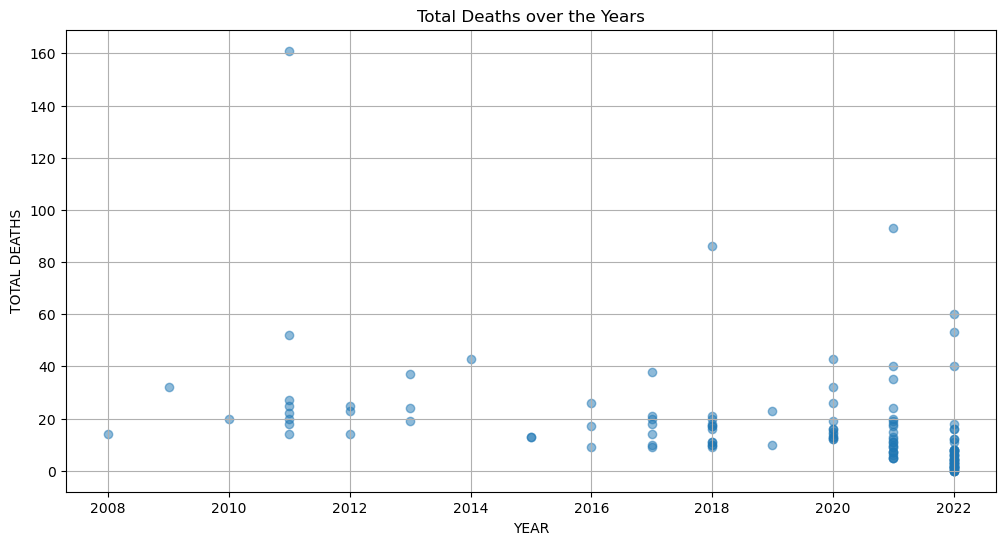

In [17]:
# Create a scatter plot for total deaths over the years 
plt.figure(figsize=(12, 6))
plt.scatter(groupbynarrow_df['YEAR'], groupbynarrow_df['TOTAL DEATHS'], alpha=0.5)
plt.title('Total Deaths over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DEATHS')
plt.grid(True)
plt.show()


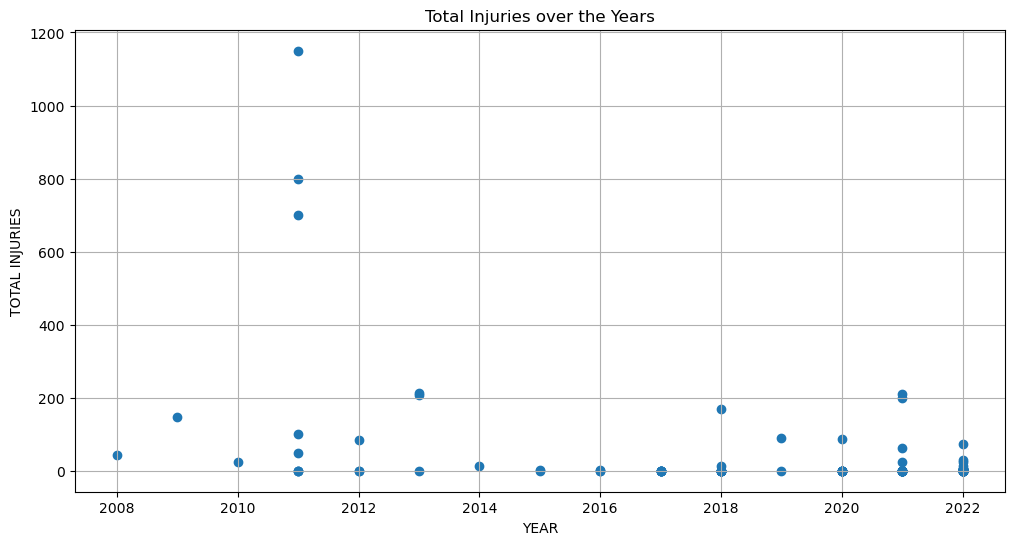

In [18]:
# Create a scatter plot for total injuries over the years 
plt.figure(figsize=(12, 6))
plt.scatter(groupbynarrow_df['YEAR'], groupbynarrow_df['TOTAL INJURIES'])
plt.title('Total Injuries over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL INJURIES')
plt.grid(True)
plt.show()

In [33]:
drop_merged_df.head()

,YEAR,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,...,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES
0,2022,NEVADA,High Wind,0.00K,0.00K,Mesonet,36.0,MS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902,0,0
1,2022,NEVADA,Heavy Snow,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903,0,0
2,2022,NEVADA,Heavy Snow,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904,0,0
3,2022,ATLANTIC SOUTH,Waterspout,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,...,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181,0,0
4,2022,AMERICAN SAMOA,Heavy Rain,50.00K,0.00K,Official NWS Observations,NaN,NaN,NaN,NaN,...,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527,0,0


In [34]:
groupbynarrow_df

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
3603,2011,MISSOURI,Tornado,161,1150,2.80B,0.00K,NWS Storm Survey,NaN,NaN,...,8.8,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105,49972,296617
373,2021,OREGON,Excessive Heat,93,0,50.00K,50.00K,ASOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158241,961302
1273,2018,CALIFORNIA,Wildfire,86,12,17.00B,0.00K,Fire Department/Rescue,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131864,788675
165,2022,FLORIDA,Hurricane,60,0,7.00B,0.00K,Official NWS Observations,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058654
12,2022,TEXAS,Heat,53,0,0.00K,0.00K,Broadcast Media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171258,1039790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,2017,COLORADO,Ice Storm,0,500,0.00K,0.00K,Law Enforcement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113125,676620
2683,2013,ARKANSAS,Heat,0,450,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79351,475985
163,2022,MISSOURI,Drought,0,350,0.00K,0.00K,Drought Monitor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174718,1065558
2255,2015,ARKANSAS,Heat,0,325,0.00K,0.00K,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100710,602650
